### <b>전이 학습(Transfer Learning)을 활용한 인공지능 서비스</b>

  1. 이미지 크롤링(image crawling) 
  2. 전이 학습(transfer learning)
  3. 웹 API 개발

In [1]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), done.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [2]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

* <b>Romantic</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [3]:
query = 'romantic'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://www.adequatetravel.com/blog/wp-content/uploads/2019/04/Romance-in-Switzerland.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://i0.wp.com/godofindia.com/wp-content/uploads/2017/08/hot-romantic-pics.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://marriagemissions.com/wp-content/uploads/2019/02/Romantic-gestures-AdobeStock_75465206.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://lisahomsy.com/wp-content/uploads/2020/06/Maldives1.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://www.wallpapers13.com/wp-content/uploads/2019/03/Romantic-couple-romance-at-sunset-love-hug-kiss-Romantic-couple-Wallpapers-free-download-3840x2400-1920x1440.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://www.thewowstyle.com/wp-content/uploads/2015/02/romantic-places-21.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://www.colemanconcierge.com/wp-content/uploads/2020/04/Romantic-Beach-via-Canva-scaled.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https:/

*  <b>Gloomy</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [4]:
query = 'gloomy'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://wallpaperboat.com/wp-content/uploads/2020/10/22/57630/gloomy-08.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/gloomy-day-hyuntae-kim.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://yesofcorsa.com/wp-content/uploads/2015/11/2206_gloomy.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://wallpapercave.com/wp/wp4696794.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://jooinn.com/images/gloomy-sky-2.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://miriadna.com/desctopwalls/images/max/Gloomy-weather.jpg)
[Error] Invalid image, not saving http://miriadna.com/desctopwalls/images/max/Gloomy-weather.jpg
[Info] Issue getting: http://miriadna.com/desctopwalls/images/max/Gloomy-weather.jpg
[Error] No active exception to reraise
#6 이미지 다운로드 (https://yesofcorsa.com/wp-content/uploads/2015/11/4971_gloomy.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://cmkt-image-prd.freetl

*  <b>Plain</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [5]:
query = 'plain'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (http://dreamicus.com/data/plain/plain-03.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://c1.staticflickr.com/9/8261/8688567245_75c695594a_b.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/great-plain-in-xinjiang-china-tcyuen.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://images.unsplash.com/photo-1517261200038-cc8143ca84bf?ixlib=rb-1.2.1&amp;q=80&amp;fm=jpg&amp;crop=entropy&amp;cs=tinysrgb&amp;w=1080&amp;fit=max&amp;ixid=eyJhcHBfaWQiOjEyMDd9)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://alearningfamily.com/main/wp-content/uploads/Plain.George-RafCC.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://media.nationalgeographic.org/assets/photos/000/255/25557.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://www.wondermondo.com/wp-content/uploads/2017/09/Carrizo4.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://www.teahub.io/photos/full/292-2926573_definition-of-a-plain.jpg

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

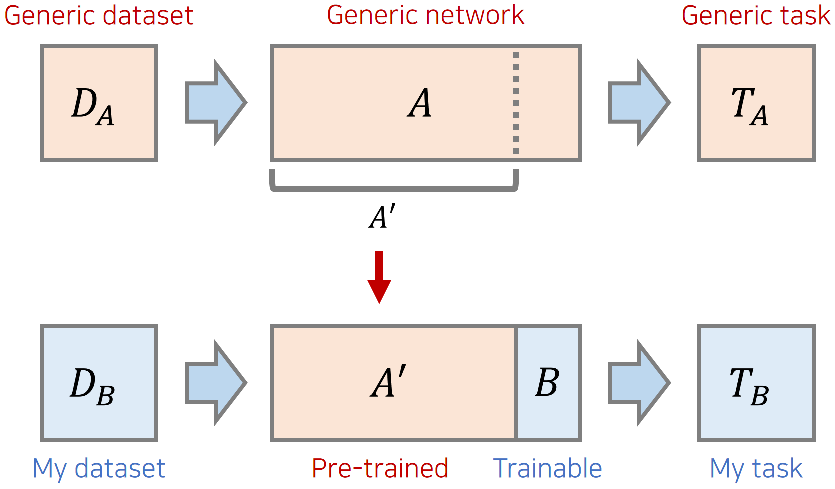

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [7]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 90
테스트 데이터셋 크기: 30
클래스: ['gloomy', 'plain', 'romantic']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


* 간단히 이미지를 시각화해 봅시다.

In [8]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


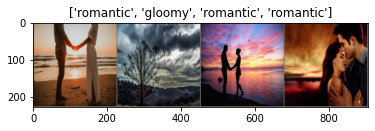

In [9]:
import matplotlib.pyplot as plt

def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [10]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

* 학습을 진행합니다.

In [11]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.1408 Acc: 40.0000% Time: 55.2882s
#1 Loss: 0.4609 Acc: 77.7778% Time: 109.4423s
#2 Loss: 0.1920 Acc: 92.2222% Time: 160.4524s
#3 Loss: 0.3597 Acc: 87.7778% Time: 211.2156s
#4 Loss: 0.2431 Acc: 91.1111% Time: 265.0420s
#5 Loss: 0.2717 Acc: 88.8889% Time: 319.6522s
#6 Loss: 0.2618 Acc: 93.3333% Time: 371.8370s
#7 Loss: 0.2440 Acc: 87.7778% Time: 423.7094s
#8 Loss: 0.2695 Acc: 92.2222% Time: 475.0843s
#9 Loss: 0.1861 Acc: 91.1111% Time: 528.5294s
#10 Loss: 0.1544 Acc: 93.3333% Time: 580.1233s
#11 Loss: 0.2207 Acc: 93.3333% Time: 631.3932s
#12 Loss: 0.3042 Acc: 93.3333% Time: 682.4307s
#13 Loss: 0.4326 Acc: 87.7778% Time: 736.9022s
#14 Loss: 0.1480 Acc: 94.4444% Time: 797.2420s
#15 Loss: 0.0423 Acc: 96.6667% Time: 855.4202s
#16 Loss: 0.1192 Acc: 94.4444% Time: 907.2616s
#17 Loss: 0.0869 Acc: 96.6667% Time: 960.1819s
#18 Loss: 0.2119 Acc: 94.4444% Time: 1012.5833s
#19 Loss: 0.0522 Acc: 100.0000% Time: 1063.5820s
#20 Loss: 0.1444 Acc: 94.4444% Time: 1114.1397s
#21 Loss: 0.1781 Acc

* 학습된 모델을 평가합니다.

[예측 결과: romantic] (실제 정답: romantic)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_te

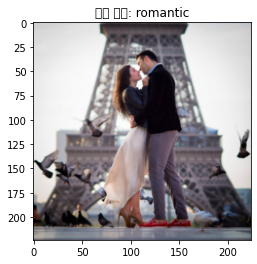

[예측 결과: plain] (실제 정답: plain)


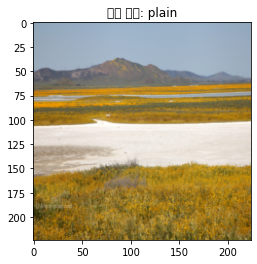

[예측 결과: plain] (실제 정답: plain)


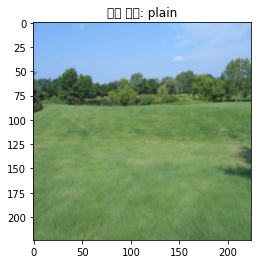

[예측 결과: plain] (실제 정답: plain)


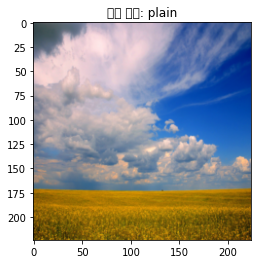

[예측 결과: gloomy] (실제 정답: gloomy)


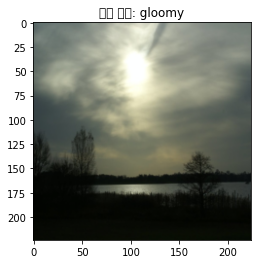

[예측 결과: romantic] (실제 정답: romantic)


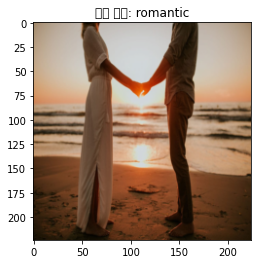

[예측 결과: romantic] (실제 정답: romantic)


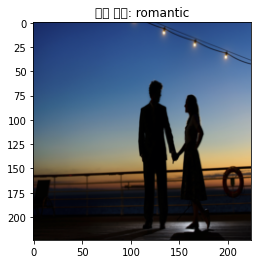

[예측 결과: plain] (실제 정답: plain)


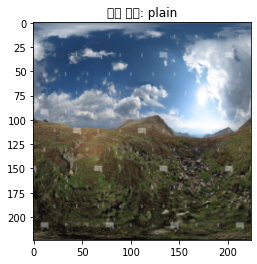

[Test Phase] Loss: 0.0129 Acc: 100.0000% Time: 8.3958s


In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='predict result: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://images.unsplash.com/photo-1518895949257-7621c3c786d7?ixlib=rb-1.2.1.jpg -O test_image.jpg

--2022-09-28 08:14:47--  https://images.unsplash.com/photo-1518895949257-7621c3c786d7?ixlib=rb-1.2.1.jpg
Resolving images.unsplash.com (images.unsplash.com)... 151.101.78.208, 2a04:4e42:12::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1938725 (1.8M) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]   1.85M  --.-KB/s    in 0.1s    

2022-09-28 08:14:48 (13.8 MB/s) - ‘test_image.jpg’ saved [1938725/1938725]



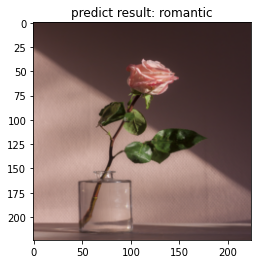

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='predict result: ' + class_names[preds[0]])

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://images.unsplash.com/photo-1585377776757-396916bea17f?ixlib=rb-1.2.1 -O test_image2.jpg

--2022-09-28 08:17:58--  https://images.unsplash.com/photo-1585377776757-396916bea17f?ixlib=rb-1.2.1
Resolving images.unsplash.com (images.unsplash.com)... 151.101.78.208, 2a04:4e42:12::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732025 (715K) [image/jpeg]
Saving to: ‘test_image2.jpg’

test_image2.jpg     100%[===================>] 714.87K  --.-KB/s    in 0.1s    

2022-09-28 08:17:58 (6.64 MB/s) - ‘test_image2.jpg’ saved [732025/732025]



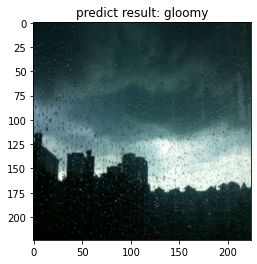

In [ ]:
from PIL import Image


image = Image.open('test_image2.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='predict result: ' + class_names[preds[0]])

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [ ]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f056-35-194-153-165.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [28/Sep/2022 09:08:00] "GET / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Sep/2022 09:08:01] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [28/Sep/2022 09:08:52] "GET / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Sep/2022 09:09:21] "GET / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Sep/2022 09:09:21] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [28/Sep/2022 09:11:01] "GET / HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [28/Sep/2022 09:11:02] "GET /favicon.ico HTTP/1.1" 404 -


* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발.